In [ ]:
# Dependencies
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import scipy.stats as st

In [ ]:
# Path to data files 
mouse_metadata_path = ("Resources/Mouse_metadata.csv")
study_results_path = ("Resources/Study_results.csv")

# Read data files 
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [ ]:
# Merge data 
data_merged = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
data_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [ ]:
# Check number of mice 
number_mice = data_merged['Mouse ID'].nunique()
number_mice

249

In [ ]:
# Duplicate Mouse ID 
duplicate_mouse_ids = data_merged.loc[data_merged.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique
duplicate_mouse_ids

<bound method Series.unique of 137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object>

In [ ]:
# Data for duplicate ID
duplicate_mouse_data = data_merged.loc[data_merged['Mouse ID'] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Clean dataframe by dropping duplicate Mouse ID 
clean_data_merge = data_merged.drop_duplicates(subset=['Mouse ID'])
clean_data_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [ ]:
# Number of mice 
update_number_mice = clean_data_merge['Mouse ID'].nunique()
update_number_mice

249

In [ ]:
# Summary Statistics 
drug_regimen = data_merged.groupby('Drug Regimen')
summary_statistics = drug_regimen.agg(
    mean_tumor_volume = ('Tumor Volume (mm3)', np.mean),
    median_tumor_volume = ('Tumor Volume (mm3)', np.median),
    variance_tumor_volume = ('Tumor Volume (mm3)', np.var),
    std_dev_tumor_volume = ('Tumor Volume (mm3)', np.std),
    SEM_tutor_volume = ('Tumor Volume (mm3)', st.sem)
)

rename_column = {
    'mean_tumor_volume': 'Mean Tumor Value',
    'median_tumor_volume': 'Median Tumor Value',
    'variance_tumor_volume': 'Variance Tumor Volume',
    'std_dev_tumor_volume': 'Std Dev Volume',
    'SEM_tutor_volume': 'SEM Tutor Volume'
}
summary_statistics.rename(columns=rename_column, inplace=True)
summary_statistics

,Mean Tumor Value,Median Tumor Value,Variance Tumor Volume,Std Dev Volume,SEM Tutor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


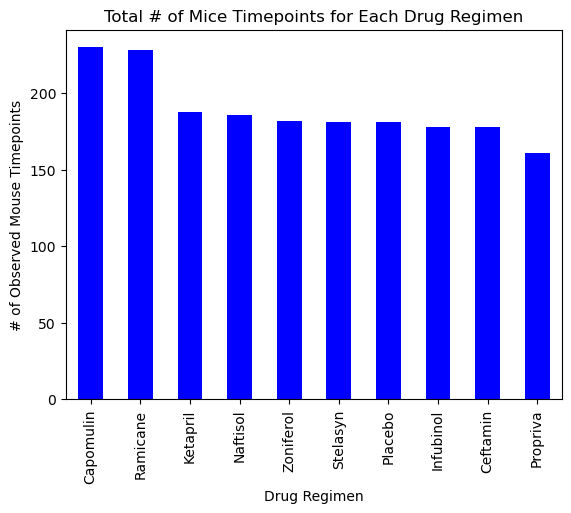

In [ ]:
# Bar using Pandas
drug_regimen_mouse_id = data_merged['Drug Regimen'].value_counts()
drug_regimen_mouse_id.plot(kind='bar', rot=90, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total # of Mice Timepoints for Each Drug Regimen')
plt.show()

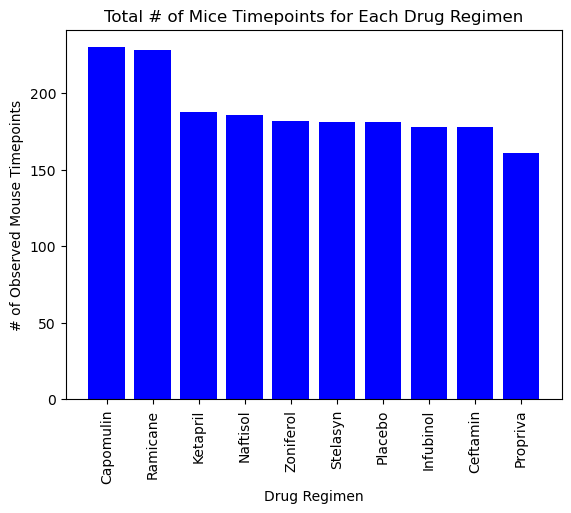

In [ ]:
# Bar using pyplot
plt.bar(drug_regimen_mouse_id.index, drug_regimen_mouse_id, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total # of Mice Timepoints for Each Drug Regimen')
plt.show()

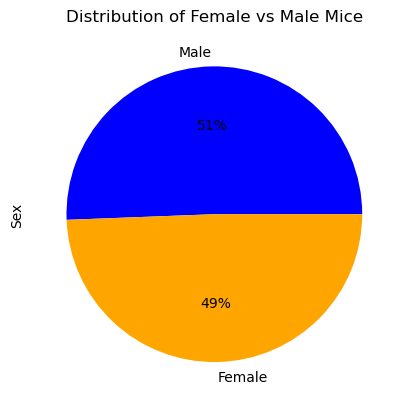

In [ ]:
# Pie chart Pandas
sex_count = data_merged['Sex'].value_counts()
sex_count.plot(kind='pie', autopct='%1.0f%%',colors=['blue', 'orange'])
plt.title('Distribution of Female vs Male Mice')
plt.show()

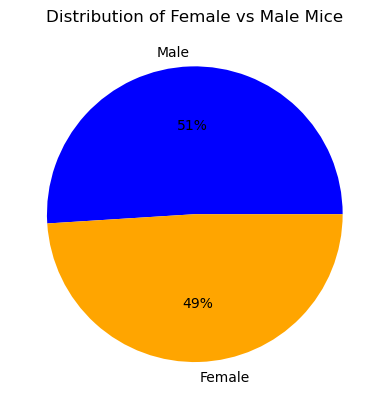

In [ ]:
# Pie chart pyplot
labels = ['Male', 'Female']
sizes = [51, 49]
colors = ['blue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()

In [ ]:
# Last (greatest) timepoint for each mouse
last_timepoint = data_merged.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max().reset_index()

# Merge with original dataframe 
tumor_volume_last_timepoint = pd.merge(last_timepoint, data_merged, on=['Drug Regimen', 'Mouse ID', 'Timepoint'], how='left')\
                            [['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

In [ ]:
# Treatments into a list 
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data 
tumor_volumes = []

# Calculate IQR, quantitatively determine if any potential outliers 
for treatment in treatments:
    mice_tumor_volume = tumor_volume_last_timepoint.loc[tumor_volume_last_timepoint['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volumes.append(mice_tumor_volume)

    quartiles = mice_tumor_volume.quantile([0.25, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = mice_tumor_volume.loc[(mice_tumor_volume < lower_bound) | (mice_tumor_volume > upper_bound)]

    print(f"{treatment}'s potential outliers:", outliers)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


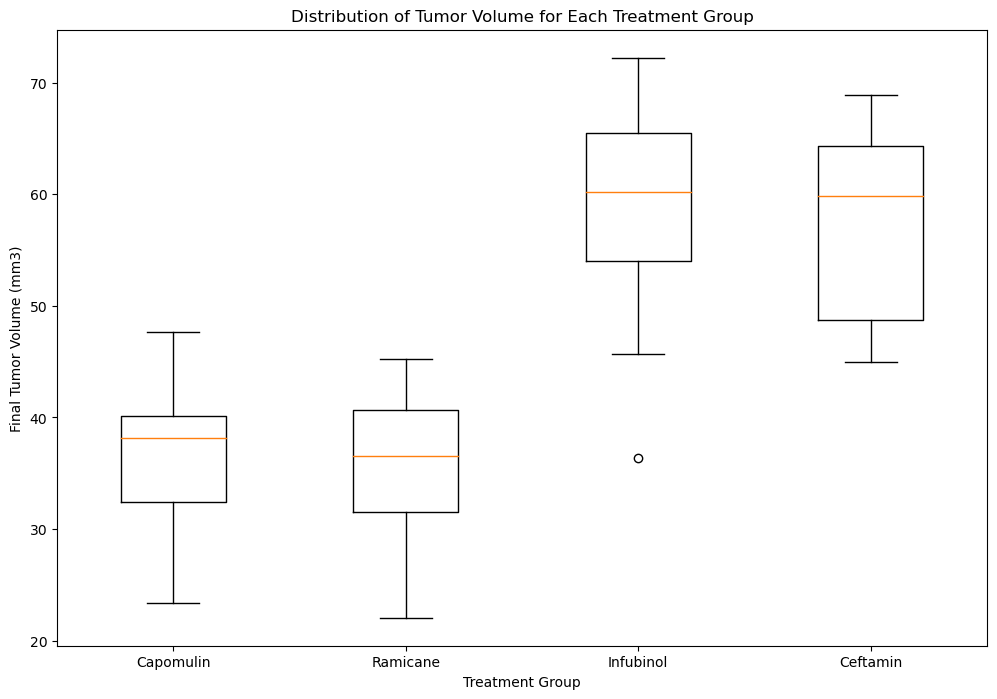

In [ ]:
# Box plot
plt.figure(figsize=(12, 8))
plt.boxplot(tumor_volumes, labels=treatments)
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.show()

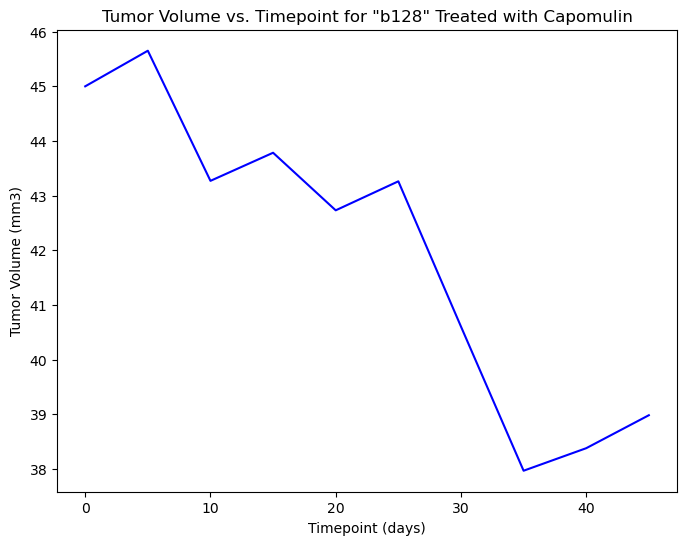

In [ ]:
# Line Plot 
capomulin_data = data_merged[data_merged['Drug Regimen'] == 'Capomulin']
selected_mouse = 'b128'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse]

plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint for "b128" Treated with Capomulin')
plt.show()

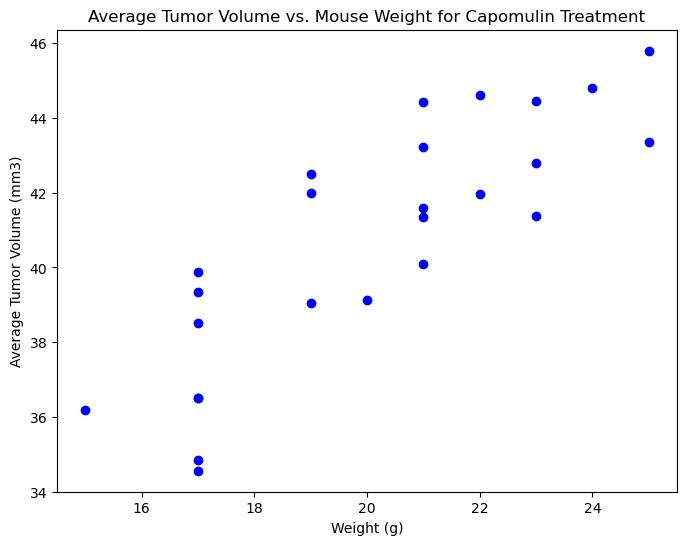

In [ ]:
# Scatter Plot 
group_mouse_id = capomulin_data.groupby('Mouse ID').agg(
    average_tumor_volume = ('Tumor Volume (mm3)', 'mean'),
    mouse_weight = ('Weight (g)', 'mean')
).reset_index()

plt.figure(figsize=(8,6))
plt.scatter(group_mouse_id['mouse_weight'], group_mouse_id['average_tumor_volume'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Treatment')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


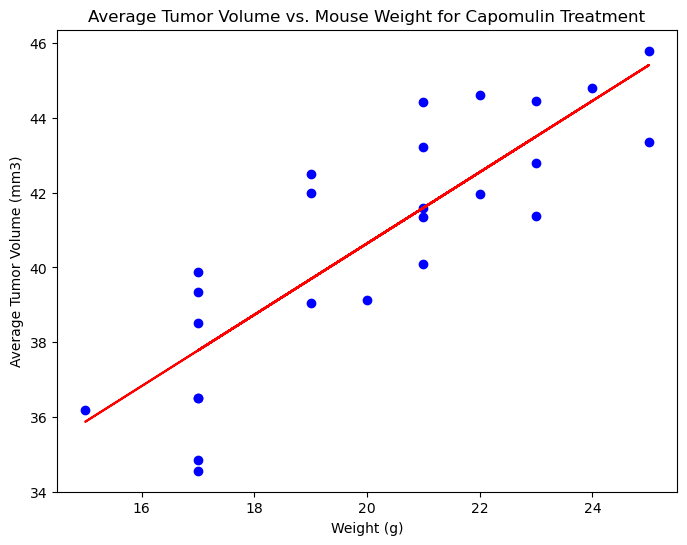

In [ ]:
# Correlation
correlation, p_value = st.pearsonr(group_mouse_id['mouse_weight'], group_mouse_id['average_tumor_volume'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Regression 
regression = st.linregress(group_mouse_id['mouse_weight'], group_mouse_id['average_tumor_volume'])
slope = regression.slope
intercept = regression.intercept

# Scattor plot 
plt.figure(figsize=(8, 6))
plt.scatter(group_mouse_id['mouse_weight'], group_mouse_id['average_tumor_volume'], color='blue')
plt.plot(group_mouse_id['mouse_weight'], slope * group_mouse_id['mouse_weight'] + intercept, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Treatment')
plt.show()